In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from chefboost import Chefboost

In [2]:
pneumonia_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/pneumonia_data.csv")
code_gender = {'M':1, 'F':0}
code_tobacco_use = {'yes':1, 'no':0}
code_pneumonia = {'yes':1, 'no':0}

pneumonia_data['gender'] = pneumonia_data['gender'].map(code_gender)
pneumonia_data['tobacco_use'] = pneumonia_data['tobacco_use'].map(code_tobacco_use)
pneumonia_data['pneumonia'] = pneumonia_data['pneumonia'].map(code_pneumonia)

X = pneumonia_data.iloc[:,0:4].values
y = pneumonia_data.iloc[:,4].values

[Text(0.5, 0.875, 'gender <= 0.5\ngini = 0.444\nsamples = 1381\nvalue = [921, 460]'),
 Text(0.3, 0.625, 'tobacco_use <= 0.5\ngini = 0.497\nsamples = 521\nvalue = [241, 280]'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'age <= 78.5\ngini = 0.473\nsamples = 346\nvalue = [213.0, 133.0]'),
 Text(0.1, 0.125, 'gini = 0.45\nsamples = 322\nvalue = [212, 110]'),
 Text(0.3, 0.125, 'gini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.4, 0.375, 'gini = 0.269\nsamples = 175\nvalue = [28, 147]'),
 Text(0.7, 0.625, 'PM2_5 <= 22.17\ngini = 0.331\nsamples = 860\nvalue = [680, 180]'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.071\nsamples = 354\nvalue = [341, 13]'),
 Text(0.8, 0.375, 'PM2_5 <= 37.775\ngini = 0.442\nsamples = 506\nvalue = [339, 167]'),
 Text(0.7, 0.125, 'gini = 0.397\nsamples = 424\nvalue = [308, 116]'),
 Text(0.9, 0.125, 'gini = 0.47\nsamples = 82\nvalue = [31, 51]')]

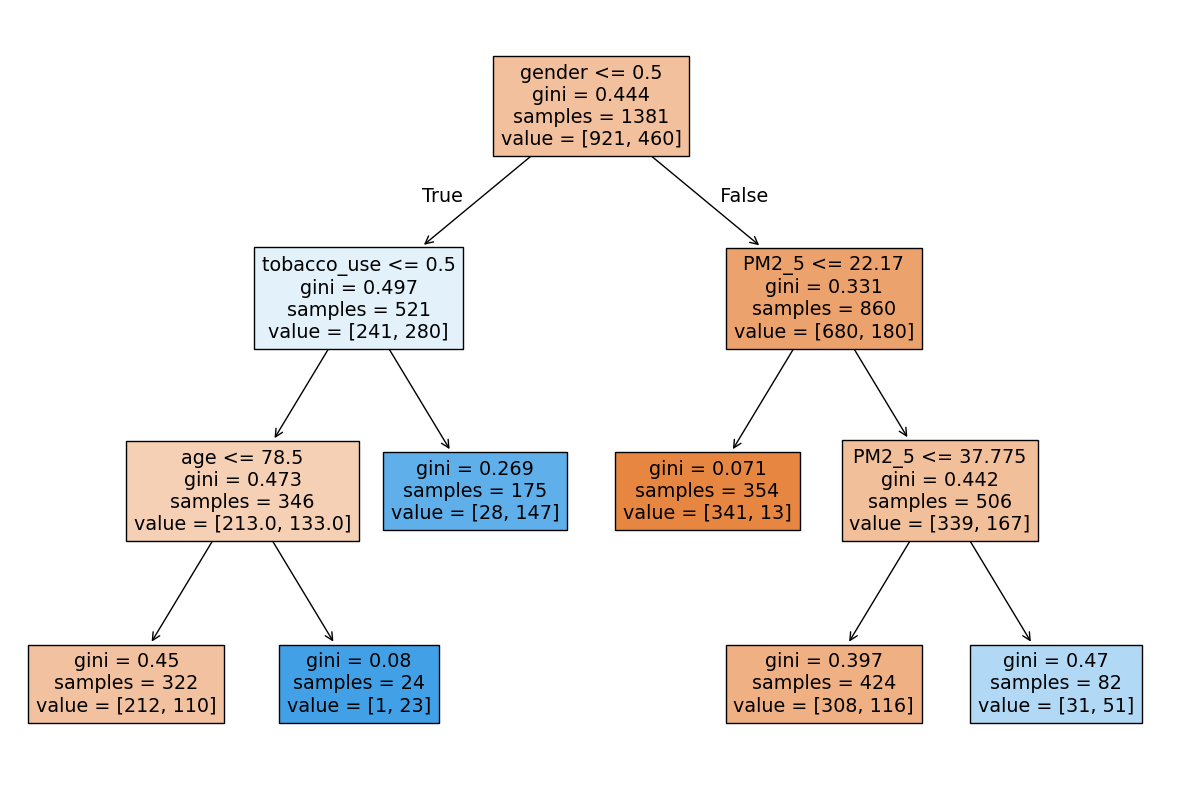

In [3]:
# Splitting data into 80% training and 20% testing sets. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=786756)

# Fitting binary classification tree with Gini splitting criterion

gini_tree = DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit = gini_tree.fit(X_train, y_train)

# Plotting fitted tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(gini_tree.fit, feature_names=['gender', 'age', 'tobacco_use', 'PM2_5'], filled=True)

In [4]:
# Computing Prediction Accuracy for testing data

def accuracy():
    y_pred = gini_tree.predict_proba(X_test)
    total = len(y_pred)
    trueclassrate = []
    cutoff = []
    for i in range(99):
        tp = 0
        tn = 0
        cutoff.append(0.01*(i+1))
        for sub1, sub2 in zip(y_pred[::,1], y_test):
            tp_ind = 1 if (sub1>0.01*(i+1) and sub2==1) else 0
            tn_ind = 1 if (sub1<0.01*(i+1) and sub2==0) else 0
            tp += tp_ind
            tn += tn_ind
        rate = (tp+tn)/total
        trueclassrate.append(rate)

    df = pd.DataFrame({'trueclassrate': trueclassrate, 'cutoff': cutoff})
    max_rate = max(trueclassrate)
    optimal = df[df['trueclassrate']==max_rate]
    print(optimal)

accuracy()

    trueclassrate  cutoff
34       0.728324    0.35
35       0.728324    0.36
36       0.728324    0.37
37       0.728324    0.38
38       0.728324    0.39
39       0.728324    0.40
40       0.728324    0.41
41       0.728324    0.42
42       0.728324    0.43
43       0.728324    0.44
44       0.728324    0.45
45       0.728324    0.46
46       0.728324    0.47
47       0.728324    0.48
48       0.728324    0.49
49       0.728324    0.50
50       0.728324    0.51
51       0.728324    0.52
52       0.728324    0.53
53       0.728324    0.54
54       0.728324    0.55
55       0.728324    0.56
56       0.728324    0.57
57       0.728324    0.58
58       0.728324    0.59
59       0.728324    0.60
60       0.728324    0.61
61       0.728324    0.62


    trueclassrate  cutoff
33       0.728324    0.34
34       0.728324    0.35
35       0.728324    0.36
36       0.728324    0.37
37       0.728324    0.38
38       0.728324    0.39
39       0.728324    0.40
40       0.728324    0.41
41       0.728324    0.42
42       0.728324    0.43
43       0.728324    0.44
44       0.728324    0.45


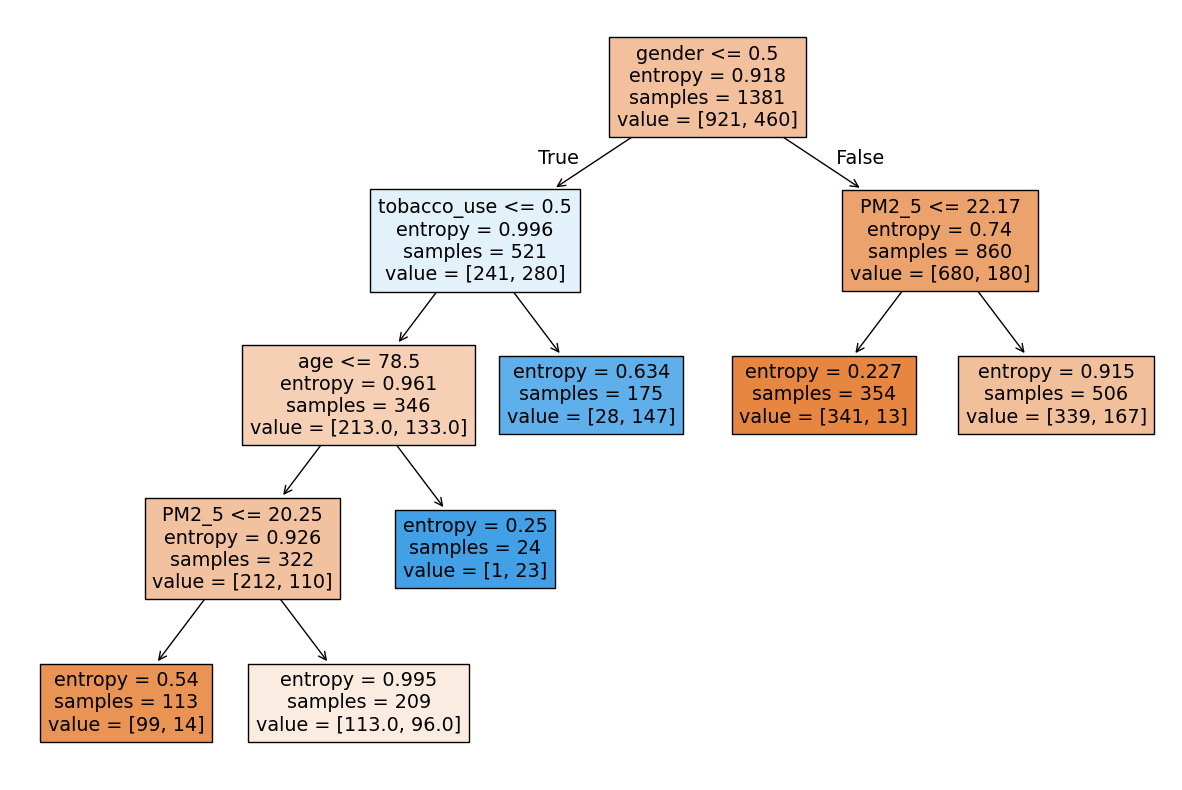

In [5]:
# Fitting binary classification tree with entropy splitting criterion.

gini_tree = DecisionTreeClassifier(max_leaf_nodes=6, criterion='entropy', random_state=199233)
gini_tree.fit = gini_tree.fit(X_train, y_train)

# Plotting fitted tree

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(gini_tree.fit, feature_names=['gender', 'age', 'tobacco_use', 'PM2_5'], filled=True)
accuracy()

In [6]:
# Fitting binary classification tree with CHAID splitting criterion.

pneumonia_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/pneumonia_data.csv")
code_gender = {'M':1, 'F':0}
code_tobacco_use = {'yes':1, 'no':0}
code_pneumonia = {'yes':1, 'no':0}

pneumonia_data['gender'] = pneumonia_data['gender'].map(code_gender)
pneumonia_data['tobacco_use'] = pneumonia_data['tobacco_use'].map(code_tobacco_use)
pneumonia_data['pneumonia'] = pneumonia_data['pneumonia'].map(code_pneumonia)

X = pneumonia_data.iloc[:,0:4].values
y = pneumonia_data.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=786756)

X_train = pd.DataFrame(X_train, columns=['age', 'gender', 'tobacco_use', 'PM2_5'])
y_train = pd.DataFrame(y_train, columns=['pneumonia'])
train_data = pd.concat([X_train, y_train], axis=1)

# Fitting binary tree with CHAID splitting criterion. 

config = {'algorithm': 'CHAID', 'max_depth': 4}
tree_chaid = Chefboost.fit(train_data, config, target_label='pneumonia')

25-01-24 15:37:56 - ⚠️ You set the algorithm to CHAID but the Decision column of your data set has non-object type.That's why, the algorithm is set to Regression to handle the data set.
25-01-24 15:37:56 - Regression tree is going to be built...
25-01-24 15:38:00 - -------------------------
25-01-24 15:38:00 - finished in 4.346008777618408 seconds
25-01-24 15:38:00 - -------------------------
25-01-24 15:38:00 - Evaluate train set
25-01-24 15:38:00 - -------------------------
25-01-24 15:38:00 - MAE: 0.22881969587255613
25-01-24 15:38:00 - MSE: 0.22881969587255613
25-01-24 15:38:00 - RMSE: 0.4783510174260698
25-01-24 15:38:00 - RAE: 0.8288284030721501
25-01-24 15:38:00 - RRSE 1.0149196234397815
25-01-24 15:38:00 - Mean: 0.333091962346126
25-01-24 15:38:00 - MAE / Mean: 68.69565217391305%
25-01-24 15:38:00 - RMSE / Mean: 143.6092945794353%


In [7]:
# Computing prediction accuracy on test set. 

X_test = pd.DataFrame(X_test, columns=['age', 'gender', 'tobacco_use', 'PM2_5'])

y_pred = []
for i in range(len(y_test)):
    y_pred.append(Chefboost.predict(tree_chaid, X_test.iloc[i,:]))

y_test = pd.DataFrame(y_test, columns=['pneumonia'])
y_pred = pd.DataFrame(y_pred, columns=['predicted'])
df = pd.concat([y_test, y_pred], axis=1)

match = []
for i in range(len(df)):
    if df['pneumonia'][i] == df['predicted'][i]:
        match.append(1)
    else:
        match.append(0)

trueclassrate = sum(match)/len(match)
print(trueclassrate)

0.7167630057803468


c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[0]>0.0:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[3]>16.420431271560787:
c:\Users\coryg\OneDrive\Desktop\STAT_574_Data_Mining\outputs\rules\rules.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if obj[2]<=0.0:
